In [1]:
import pandas as pd
"""
    Used for data manipulation and analysis
"""

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
"""
    It is a suite of libraries and programs for symbolic and statistical natural language 
    rocessing (NLP) for English written in the Python programming language. 
"""

import re
"""
    A regular expression (or RE) specifies a set of strings that matches it. The functions 
    in this module is to check if a particular string matches a given regular expression.
"""

import matplotlib.pyplot as plt
"""
    Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 
"""

"""
    Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. 
    It provides a selection of efficient tools for machine learning and statistical modeling including
    classification, regression, clustering and dimensionality reduction via a consistence interface in Python. 
    This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.
"""

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
"""
    CountVectorizer transforms text into a sparse matrix of n-gram counts. 
    Tfidftransformer will systematically compute word counts using CountVectorizer and 
    then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores.
"""

from sklearn.metrics import classification_report, confusion_matrix
"""
    classification_report builds a text report showing the main classification metrics. 
    confusion_matrix computes confusion matrix to evaluate the accuracy of a classification.
"""

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
"""
    accuracy_score used to calculate the accuracy of either the faction or count of correct prediction in Python Scikit learn.
    Compute the F1 score, also known as balanced F-score or F-measure.
    
    The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
    The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
    The best value is 1 and the worst value is 0.
    
    The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
    The recall is intuitively the ability of the classifier to find all the positive samples.
    The best value is 1 and the worst value is 0.
    
    The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches 
    its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
    
    This metric is calculated as:
    F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
"""

from sklearn.svm import LinearSVC
"""
    Linear Support Vector Classification is similar to SVC with parameter kernel=’linear’, but implemented in terms of 
    liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and 
    should scale better to large numbers of samples.
    
    This class supports both dense and sparse input and the multiclass support is 
    handled according to a one-vs-the-rest scheme.
"""

from sklearn.pipeline import Pipeline
"""
    The pipeline is a Python scikit-learn utility for orchestrating machine learning operations. Pipelines function by 
    allowing a linear series of data transforms to be linked together, resulting in a measurable modeling process.
"""

from sklearn.linear_model import SGDClassifier, LogisticRegression
"""
    LogisticRegression implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, 
    ‘saga’ and ‘lbfgs’ solvers. Regularization is applied by default. It can handle both dense and 
    sparse input.
    
    SGDClassifier implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient 
    of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength 
    schedule (aka learning rate).
    
    For best results using the default learning rate schedule, the data should have zero mean and unit variance.
"""

from sklearn.neural_network import MLPClassifier
"""
    Multi-layer Perceptron classifier. This model optimizes the log-loss function using LBFGS or 
    stochastic gradient descent.
"""

from sklearn.ensemble import GradientBoostingClassifier
"""
    GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary 
    differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of 
    the binomial or multinomial deviance loss function. Binary classification is a special case where only a single 
    regression tree is induced.
"""

from sklearn import tree
"""
    Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 
    The goal is to create a model that predicts the value of a target variable by learning simple decision rules 
    inferred from the data features. A tree can be seen as a piecewise constant approximation.
"""

import numpy as np
"""
    NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays 
    and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
"""

""" 
    Itertools is a module in python, it is used to iterate over data structures that can be stepped over using a 
    for-loop. Such data structures are also known as iterables.
"""
import itertools


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pradhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def create_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    to plot a sklearn confusion matrix(cm)

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    """
        Accuracy (all correct / all) = (TP + TN) / (TP + TN + FP + FN)
    """
    
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('YlOrRd') 
    """ 
        To select the colour theme of the confusion matrix
    """

    plt.figure(figsize=(5, 4))
    """
        To create a figure with the given width, height in inches.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    """
       To display data as an image, i.e., on a 2D regular raster.
    """
    
    plt.title(title)
    plt.colorbar()
    """
       To display a title and colorbar on the axes.
    """
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    """
        To put the labels on the confusion matrix, with or without rotation.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    """
        To normalize the confusion matrix by slicing and adding a new axis.
    """


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    """
        To calculate the threshold by finding the maximum value in confusion matrix.
    """
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    """
        To display the values in the confusion matrix with different colours and precision.
    """

    plt.tight_layout()
    """
        This automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
    """
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    """
        To plot the the labels on their respective axes.
    """
    
    plt.show()
    """
        To show the confusion matix on screen.
    """

In [3]:
stops = set(stopwords.words("english"))
"""
    Stopwords are the English words which does not add much meaning to a sentence.
    They can safely be ignored without sacrificing the meaning of the sentence.
"""
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text
    """
        We store the argument of cleantext function in a tuple
        variable 'text' and split the words and then join them 
        after adding the blank spaces between the words.
        It returns the string passed after removing all the stopwords.
    """

In [4]:
"""
   Read an Excel file into a pandas DataFrame
"""
train = pd.read_excel('../data/Constraint_Train.xlsx')
val = pd.read_excel('../data/Constraint_Val.xlsx')

In [5]:
"""
    A lambda function is a small anonymous function that can 
    take any number of arguments, but can only have one expression.

    The map() function executes a specified function for each item in 
    an iterable. The item is sent to the function as a parameter.
"""
train["tweet"] = train["tweet"].map(lambda x: cleantext(x))
val["tweet"] = val["tweet"].map(lambda x: cleantext(x))

In [6]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))
    """
        Here, we are printing the confusion matrix, its accuracy, precision, recall and F1 score.
    """

SVM
val:
[[ 963   57]
 [  83 1037]]
              precision    recall  f1-score   support

        fake       0.92      0.94      0.93      1020
        real       0.95      0.93      0.94      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.94      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.9345794392523364
Precison :  0.9348008619335585
Recall :  0.9345794392523364
F1 :  0.9345519215989282


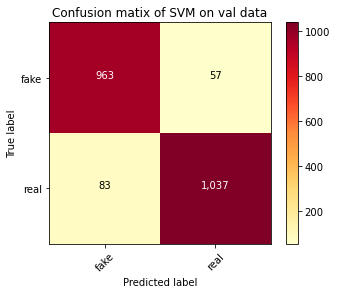

In [7]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
"""
    The purpose of the pipeline is to assemble several steps that can be 
    cross-validated together while setting different parameters.
"""
fit = pipeline.fit(train['tweet'],train['label'])
"""
    “fit” to learn on the data and acquire state "predict" to actually 
    process the data and generate a prediction.
"""
print('SVM')
print ('val:')
pred=pipeline.predict(val['tweet'])
"""
    Transform the data, and apply predict with the final estimator.
"""
print_metrices(pred,val['label'])
create_confusion_matrix(confusion_matrix(val['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of SVM on val data')

"""
    Transform the data from the excel sheet which are not under 'label' 
    column and apply predict with the final estimator.

    This will be used later to print additional informations, like data types and memory used.
"""

val_ori = pd.read_excel('../data/Constraint_Val.xlsx')
svm_val_misclass_df = val_ori[pred!=val['label']]

Logistic Regression
val:
[[ 959   61]
 [  94 1026]]
              precision    recall  f1-score   support

        fake       0.91      0.94      0.93      1020
        real       0.94      0.92      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.927570093457944
Precison :  0.9279421090866252
Recall :  0.927570093457944
F1 :  0.9275350904769529


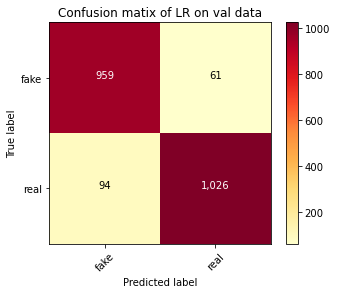

In [8]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('Logistic Regression')
print ('val:')
pred=pipeline.predict(val['tweet'])

print_metrices(pred,val['label'])
create_confusion_matrix(confusion_matrix(val['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of LR on val data')

Gradient Boost
val:
[[921  99]
 [183 937]]
              precision    recall  f1-score   support

        fake       0.83      0.90      0.87      1020
        real       0.90      0.84      0.87      1120

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140

Accuracy :  0.8682242990654205
Precison :  0.8708280648708081
Recall :  0.8682242990654205
F1 :  0.8681856239752643


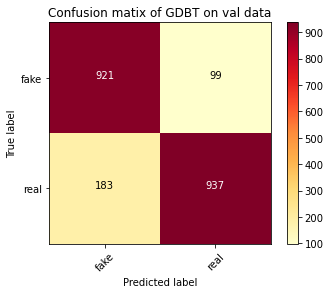

In [9]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('Gradient Boost')
print ('val:')
pred=pipeline.predict(val['tweet'])

print_metrices(pred,val['label'])
create_confusion_matrix(confusion_matrix(val['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of GDBT on val data')

Decision Tree
val:
[[860 160]
 [155 965]]
              precision    recall  f1-score   support

        fake       0.85      0.84      0.85      1020
        real       0.86      0.86      0.86      1120

    accuracy                           0.85      2140
   macro avg       0.85      0.85      0.85      2140
weighted avg       0.85      0.85      0.85      2140

Accuracy :  0.852803738317757
Precison :  0.8528468922615775
Recall :  0.852803738317757
F1 :  0.8528206534471756


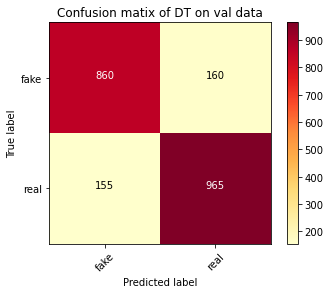

In [10]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
print('Decision Tree')
print ('val:')
pred=pipeline.predict(val['tweet'])

print_metrices(pred,val['label'])
create_confusion_matrix(confusion_matrix(val['label'],pred),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion matix of DT on val data')

In [11]:
"""
    Here we print additional informations, like data types and memory used.
"""
svm_val_misclass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1 to 2138
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      140 non-null    int64 
 1   tweet   140 non-null    object
 2   label   140 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.4+ KB


In [12]:
"""
    Here we store the final results to an excel file.
"""
svm_val_misclass_df.to_excel('../results/svm_val_misclassified.xlsx')